On suppose que des points $\mathbf y_i$ sont tirés aléatoirement sur une variété $\mathcal{M}$ de dimension $t$, munie d'une métrique $d_\mathcal{M}$. Ces points sont envoyés par un plongement $\psi$, dans un espace  $\mathcal{X}$ de dimension $d, t<<d$,, muni de la métrique euclidienne,  résultant en les points d'observation $\mathbf x_i$. L'objectif des méthodes de réduction de dimension est de proposer des algorithmes permettant de retrouver $\mathcal{M}$ , et d'expliciter $\psi$ et les  $\mathbf y_i$, étant donnés soit les individus $\mathbf x_i\in \mathcal{X}$, soit des informations de distances entre chaque paire de $\mathbf x_i$. 

Dit autrement, nous supposons que les variables mesurées sur les individus ne sont pas indépendantes, et qu'il est possible de représenter les $\mathbf x_i$ sur un espace de dimension réduit, variété de dimension $t$. On parle souvent de réduction de dimension, ou  pour certaines méthodes de manifold learning. 


# Positionnement multidimensionnel

## Position du problème
Le Positionnement multidimensionnel, ou multidimensional scaling (MDS) est un ensemble de méthodes dont l'objectif est d'identifier la variété linéaire $\mathcal{M}$ à partir de données de proximité (ou de dissimilarité) observées sur les individus $\mathbf x_i,1\leq i\leq n$.  

![](images/mds.jpg)



Ces proximités ne doivent pas nécessairement être des distances, mais peuvent être des associations (valeur absolue d'un coefficient de corrélation par exemple), ou toute autre mesure quantitative ou qualitative  permettant de discriminer deux individus entre eux.  La seule contrainte est une contrainte de monotonie sur cette mesure de proximité.

## Notations
On note $\delta_{ij}$ la dissimilarité entre $\mathbf x_i$ et $\mathbf x_j$. Une matrice de proximité  $\Delta$ est une matrice symétrique, dont la partie triangulaire supérieure (ou inférieure) est formée des $\delta_{ij}, i\leq j$ (resp. $i\geq j$), avec la convention $\delta_{ii}=0, i\in[\![1,n]\!]$. 

On supposera de plus que l'inégalité triangulaire est satisfaite sur les éléments de $\Delta$ (i.e $\delta_{ij}\leq \delta_{ik}+\delta_{kj}$) pour associer une métrique à $\Delta$. Dans certaines applications, la contrainte de symétrie peut être relâchée.


# MDS classique
On suppose que $\mathbf x_i\in\mathbb{R}^d$ et que $\Delta$ est définie par la métrique euclidienne.

$$(\forall i,j\in[\![1,n]\!])\quad \delta_{ij} = \|\mathbf x_i-\mathbf x_j\|$$

On a alors $ \delta_{ij}^2 = \|\mathbf x_i-\mathbf x_j\|^2 = \|\mathbf x_i\|^2+\|\mathbf x_j\|^2-2\mathbf x_i^T\mathbf x_j$.  

En notant  $\delta_{i0}^2=\|\mathbf x_i\|^2$ la distance au carré de $\mathbf x_i$ à l'origine, et en sommant sur $i$ et $j$, on obtient 

$$
\frac{1}{n}\displaystyle\sum_{i=1}^n\delta_{ij}^2 &=& \frac{1}{n}\displaystyle\sum_{i=1}^n(\delta_{i0}^2+\delta_{j0}^2)\\
\frac{1}{n}\displaystyle\sum_{j=1}^n\delta_{ij}^2 &=& \delta_{i0}^2+\frac{1}{n}\displaystyle\sum_{j=1}^n\delta_{j0}^2\\
\frac{1}{n^2}\displaystyle\sum_{i,j=1}^n\delta_{ij}^2 &=& \frac{2}{n}\displaystyle\sum_{i=1}^n(\delta_{i0}^2)
$$

On pose alors : 

$$
a_{ij}&=&-\frac{1}{2}\delta_{ij}^2, \quad a_{i.}=\frac{1}{n}\displaystyle\sum_{j=1}^na_{ij}\\
a_{.j}&=&\frac{1}{n}\displaystyle\sum_{i=1}^na_{ij}, \quad a_{..}=\frac{1}{n^2}\displaystyle\sum_{i,j=1}^na_{ij}\\
b_{ij} &=& \mathbf x_i^T\mathbf x_j = -\frac{1}{2}\left (\delta_{ij}^2-\delta_{i0}^2-\delta_{j0}^2 \right )
$$

de sorte que 

$$b_{ij}=a_{ij}-a_{i.}-a_{.j}+a_{..}$$

ou, en notation matricielle, avec $A=(a_{ij})$ et $B=(b_{ij})$

$$B=HAH$$

où $H=I-\frac{1}{n}J$, $J$ étant une matrice $n\times n$ de coefficients tous égaux à 1.


Le positionnement multidimensionnel vise à trouver des points $\mathbf y_1\cdots \mathbf y_n\in\mathbb{R}^t,t<d$, appelés coordonnées principales, qui représentent les $\mathbf x_i\in\mathbb{R}^d$, de sorte que les distances entre paires de points soient au mieux respectées.  Notons que si les dissimilarités sont définies comme des distances euclidiennes, alors la représentation MDS est équivalente à celle obtenue par l'ACP, les coordonnées principales étant identiques aux $t$ premiers scores sur les composantes principales des $\mathbf x$.

Cependant, l'ACP ne peut être appliquée puisque les données d'entrée ne sont pas les individus, mais les $\delta_{ij}$. La démarche est donc de former la matrice $A$ à partir de $\Delta$, puis $B=HAH$. Il s'agit ensuite de trouver $B^*=(b_{ij}^*)$, de rang au plus $t$, qui minimise

$$Tr\left [(B-B^*)^2\right ] = \displaystyle\sum_{i,j=1}^n(b_{ij}-b^*_{ij})^2$$

Si $Sp(B)=\{\lambda_i\}_{1\leq i\leq n}$ et $Sp(B^*)=\{\lambda^*_i\}_{1\leq i\leq n}$ alors ce minimum est donné par 

$$\displaystyle\sum_{i=1}^n
(\lambda_i-\lambda^*_i)^2$$ 

avec $\lambda^*_i = max(\lambda_i,0), i\in[\![1,t]\!]$ et $0$ sinon.

En notant $\Lambda=diag(\lambda_1\cdots \lambda_n)$ et $V=(\mathbf{v}_1\cdots \mathbf{v}_n)$ la matrice des vecteurs propres de $B$ alors $B=V\Lambda V^T$. 

Si $B$ est semi définie positive avec $Rg(B)=t<n$, les $t$ plus grandes valeurs propres sont positives et les $n-t$ autres nulles. En notant $\Lambda_1=diag(\lambda_1\cdots \lambda_t)$ et $V_1=(\mathbf{v}_1\cdots \mathbf{v}_t)$ alors 

$$B=V\Lambda V^T=V_1\Lambda_1V_1^T=(V_1\Lambda_1^{1/2})(\Lambda_1^{1/2}V_1)=YY^T$$

où 

$$Y=V_1\Lambda_1^{1/2}=\left (\sqrt{\lambda_1}\mathbf{v}_1\cdots \sqrt{\lambda_t}\mathbf{v}_t\right)=(\mathbf y_1\cdots \mathbf y_n)^T$$

Les coordonnées principales sont les colonnes de $Y^T$ dont les distances paire à paire $d_{ij}^2=\|\mathbf y_i-\mathbf y_j\|^2$ sont égales aux distances $\delta_{ij}$.


Si $B$ n'est pas semi définie positive, on peut soir ignorer les valeurs propres négatives, soit décaler les valeurs de la matrice de dissimilarité et recommencer la calcul. 


```{prf:remark}
:class: dropdown
La solution obtenue n'est pas unique : Si $\mathbf P$ est une transformation orthogonale, alors $\|\mathbf P(\mathbf y_i-\mathbf y_j)\|^2 = \|\mathbf y_i-\mathbf y_j\|^2$. Ainsi par exemple, la solution est définie à rotation près.
```

De même que pour l'ACP, la détermination de $t$ reste empirique. Une méthode populaire consiste à tracer un graphe des valeurs propres de $B$, ordonnées (de la plus grande à la plus petite), et regarder à quel ordre ces valeurs se "stabilisent".

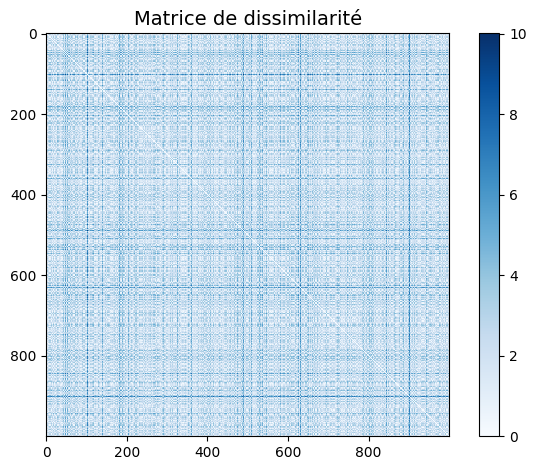

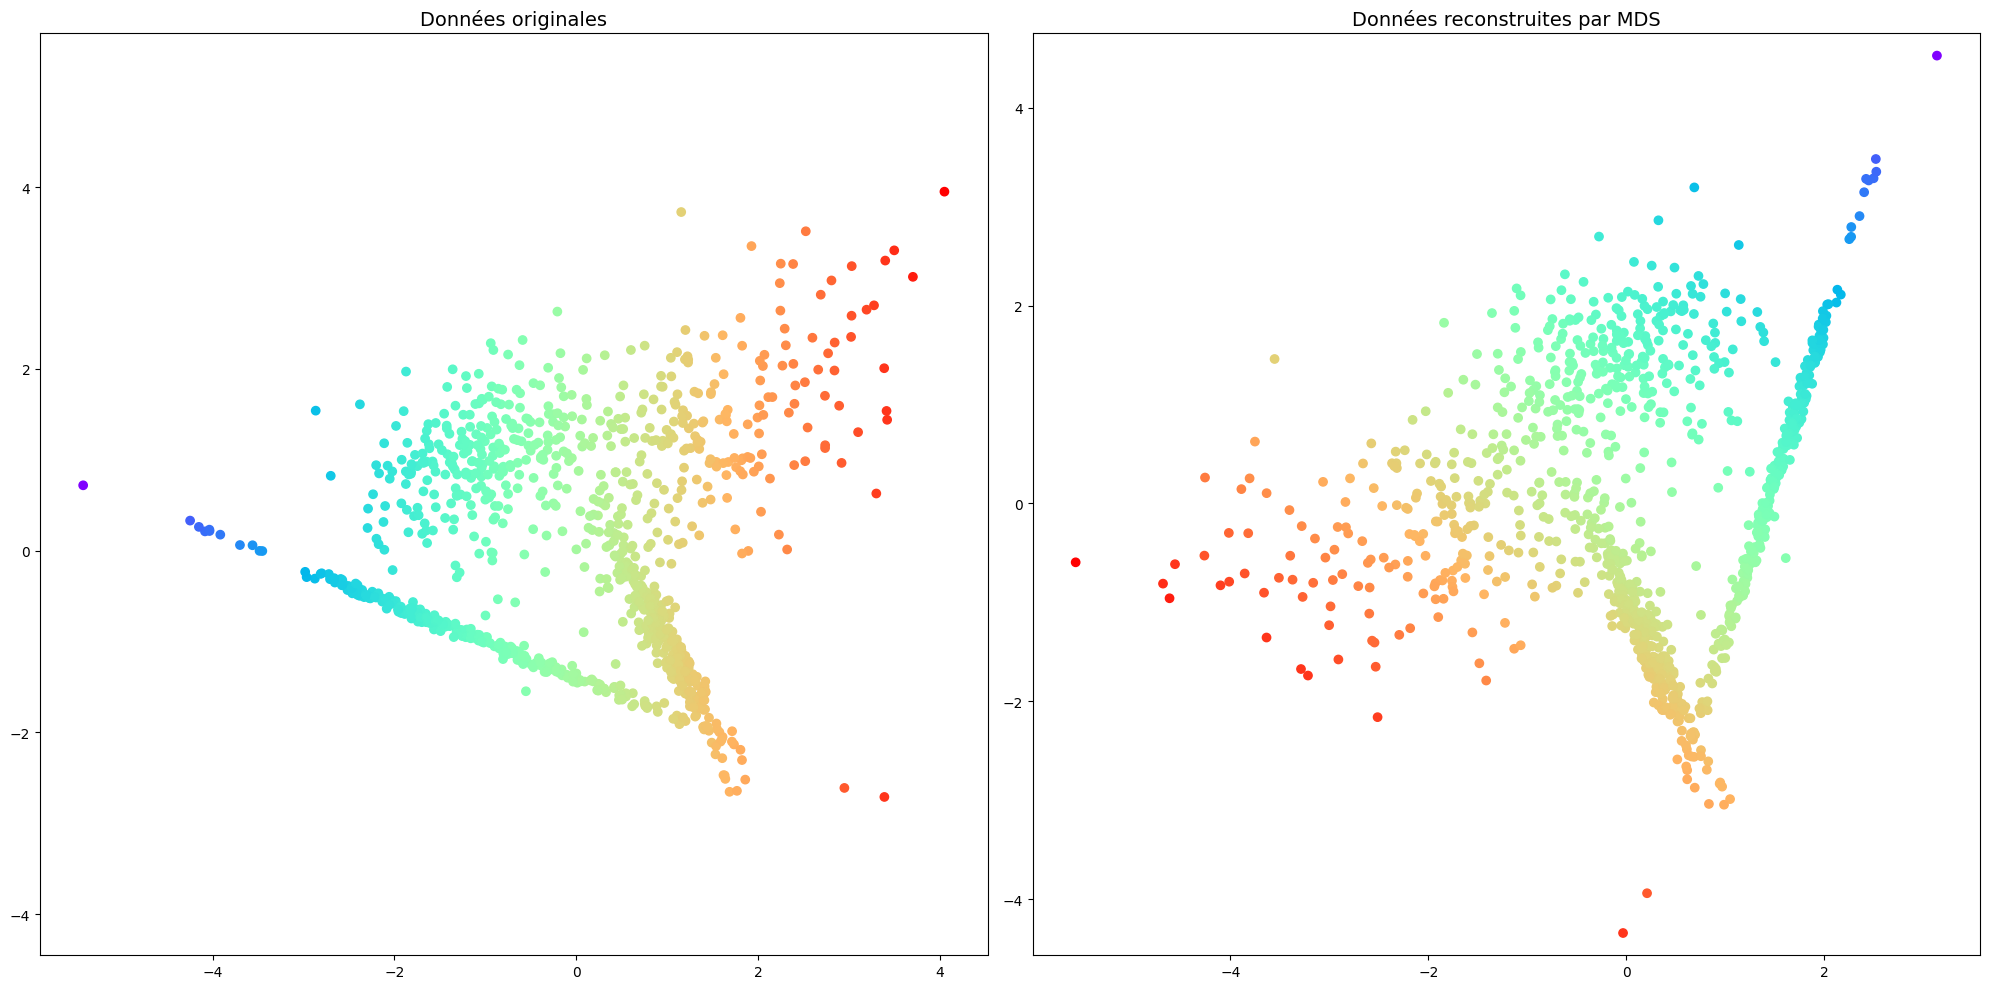

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Construction d'une matrice de dissimilarité
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2,
                                    n_informative=2, n_redundant=0)
colorize = dict(c=X[:, 0], cmap=matplotlib.colormaps['rainbow'])                                   
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.title("Matrice de dissimilarité",fontsize=14)
plt.colorbar();
plt.tight_layout()

from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', normalized_stress='auto',random_state=1)
out = model.fit_transform(D)

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');
plt.title("Données originales",fontsize=14)
plt.subplot(1, 2, 2)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');
plt.title("Données reconstruites par MDS",fontsize=14)
plt.tight_layout()

In [2]:
from IPython.display import Video
Video("videos/MDS.mp4",embed =True,width=800)

# MDS métrique
Il est possible de généraliser le positionnement multidimensionnel classique en cherchant $\mathbf x_1\cdots \mathbf x_n$ tels que $f(\delta_{ij}) \approx\hat{\delta}_{ij} = \|\mathbf x_i-\mathbf x_j\|$ où 
$f$ est généralement monotome paramétrique, du type $f(u)=\alpha+\beta u$.



$ \approx$ peut être défini de plusieurs manières :
- perte quadratique : 

$$\mathcal{L}(\hat{\delta}_{ij}) = \left (\frac{\displaystyle\sum_{i<j}\left ( \hat{\delta}_{ij} -f(\delta_{ij})\right )^2}{\displaystyle\sum_{i<j} \delta_{ij}^2} \right )^\frac{1}{2}$$ 

et le positionnement multidimensionnel métrique minimise $\mathcal{L}(\hat{\delta}_{ij})$ en fonction de $\alpha,\beta$ et des $\delta_{ij}$.
- mapping de Sammon : 

$$\mathcal{L}(\hat{\delta}_{ij}) =\frac{1}{\displaystyle\sum_{l<k} \delta_{lk}}\displaystyle\sum_{i<j} \frac{\left ( \hat{\delta}_{ij} -\delta_{ij}\right )^2}{\delta_{ij}}$$ 

Dans ce cas, les petites valeurs de $\delta_{ij}$ sont préservées.



# MDS non métrique
Dans certaines applications, on ne connaît que l'ordre relatif des dissimilarités, et pas l'écart entre deux dissimilarités successives. Le positionnement multidimensionnel non métrique décrit des méthodes qui donnent davantage d'importance à l'ordre des proximités plutôt que la conservation des distances. 

 On cherche $\mathbf x_1\cdots \mathbf x_n$ tels que $f(\delta_{ij}) \approx\hat{\delta}_{ij} = \|\mathbf x_i-\mathbf x_j\|$ où $f$ est généralement définie implicitement.

$f$ définit des disparités $f(\delta_{ij}) = \delta_{ij}^*$ si elle préserve l'ordre des dissimarités, i.e. 

$$\delta_{ij}<\delta_{kl}\Leftrightarrow\delta_{ij}^*<\delta_{kl}^*$$

Le positionnement multidimensionnel de Kruskall cherche alors à minimiser 

$$\mathcal{L}(\hat{\delta}_{ij}) = \left (\frac{\displaystyle\sum_{i<j}\left ( \hat{\delta}_{ij} -\delta_{ij}^*\right )^2}{\displaystyle\sum_{i<j} \hat{\delta}_{ij}^2} \right )^\frac{1}{2}$$